In [1]:
import numpy as np

# Load the data from the uploaded file
file_path = 'adroit_actions.npy'
trajectories = np.load(file_path, allow_pickle=True)

# Number of trajectories
num_trajectories = len(trajectories)
# sub_indices = {0:[135, 305], 1:[221, 397], 2:[313, 474], 3:[305, 393], 4:[389, 482], 6:[299, 390], 7:[325, 713], 9:[135, 310]}
# freqs = np.array([2,            2,              2,              1,          1,              1,          4,            2])


# sub_indices = {0:[135, 305], 1:[134, 400], 2:[133, 733], 3:[134, 483], 4:[133, 482], 5:[135, 230], 6:[135, 475], 7:[228, 810], 8:[133, 420], 9:[133, 420]}
# freqs = np.array([2, 3, 7, 4, 4, 1, 4, 6, 3, 3])

In [2]:
def is_close(a: np.ndarray, b: np.ndarray, tol: float = 1e-3) -> bool:
    return np.all(np.abs(a - b) < tol)

# start = 135
step = 3
length = 115
for i in range(num_trajectories):
    t_len = len(trajectories[i])
    print('----', i, '----')
    for start in range(t_len-length):
        cur = start+85
        while cur < start+length-step:
            if is_close(trajectories[i][start], trajectories[i][cur]) and is_close(trajectories[i][start+step], trajectories[i][cur+step]) and is_close(trajectories[i][start-step], trajectories[i][cur-step]):
                print(start, cur)
            cur += 1

---- 0 ----
---- 1 ----
---- 2 ----
---- 3 ----
---- 4 ----
---- 5 ----
---- 6 ----
---- 7 ----
---- 8 ----
---- 9 ----
---- 10 ----
---- 11 ----
---- 12 ----
---- 13 ----
---- 14 ----
---- 15 ----
---- 16 ----
---- 17 ----
---- 18 ----
---- 19 ----
---- 20 ----
---- 21 ----
---- 22 ----
---- 23 ----
---- 24 ----
---- 25 ----
---- 26 ----
---- 27 ----
---- 28 ----
---- 29 ----
---- 30 ----
---- 31 ----
---- 32 ----
---- 33 ----
---- 34 ----
---- 35 ----
---- 36 ----
---- 37 ----
---- 38 ----
---- 39 ----
---- 40 ----
---- 41 ----
---- 42 ----
---- 43 ----
---- 44 ----
---- 45 ----
---- 46 ----
---- 47 ----
---- 48 ----
---- 49 ----
---- 50 ----
---- 51 ----
---- 52 ----
---- 53 ----
---- 54 ----
---- 55 ----
---- 56 ----
---- 57 ----
---- 58 ----
---- 59 ----
---- 60 ----
---- 61 ----
---- 62 ----
---- 63 ----
---- 64 ----
---- 65 ----
---- 66 ----
---- 67 ----
---- 68 ----
---- 69 ----
---- 70 ----
---- 71 ----
---- 72 ----
---- 73 ----
---- 74 ----
---- 75 ----
---- 76 ----
---- 77 -

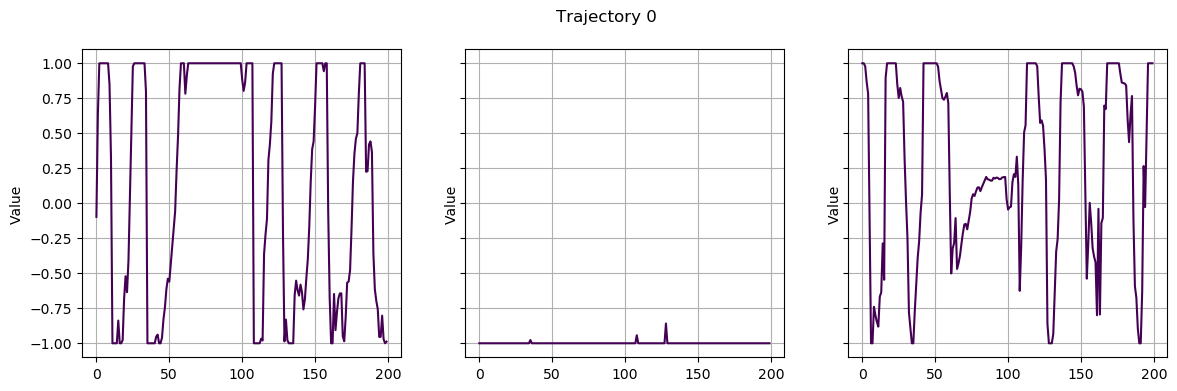

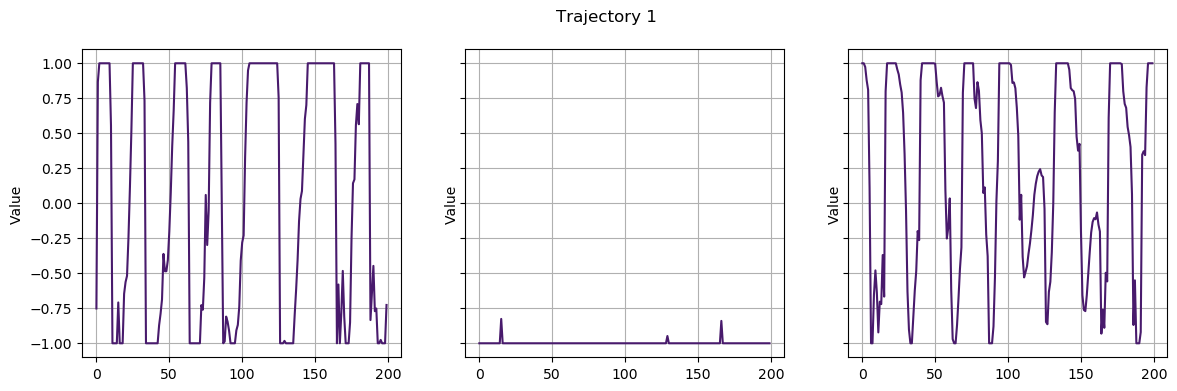

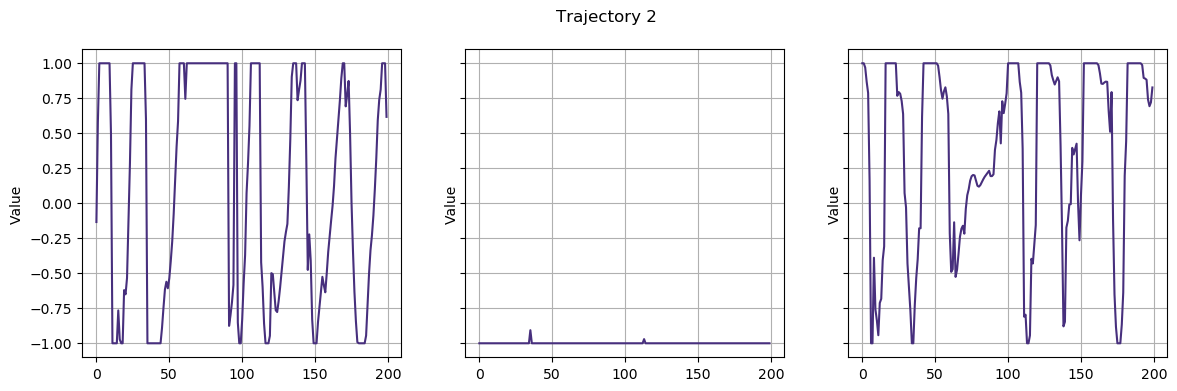

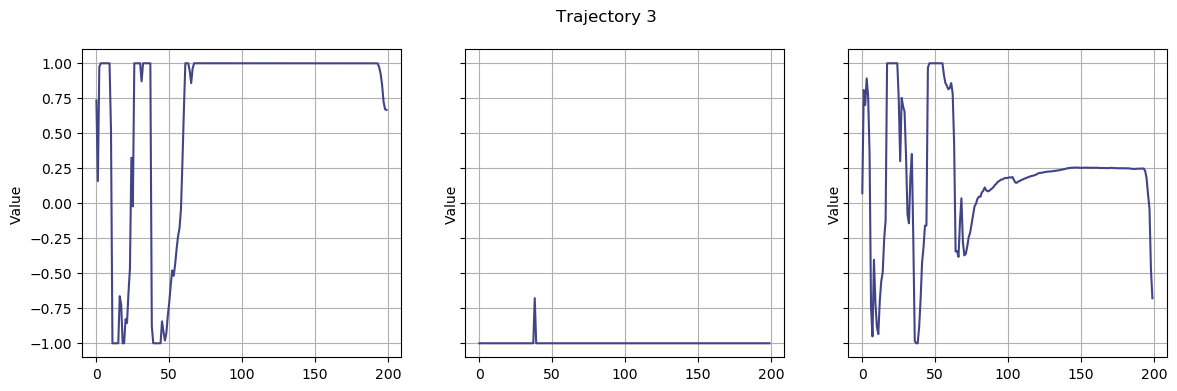

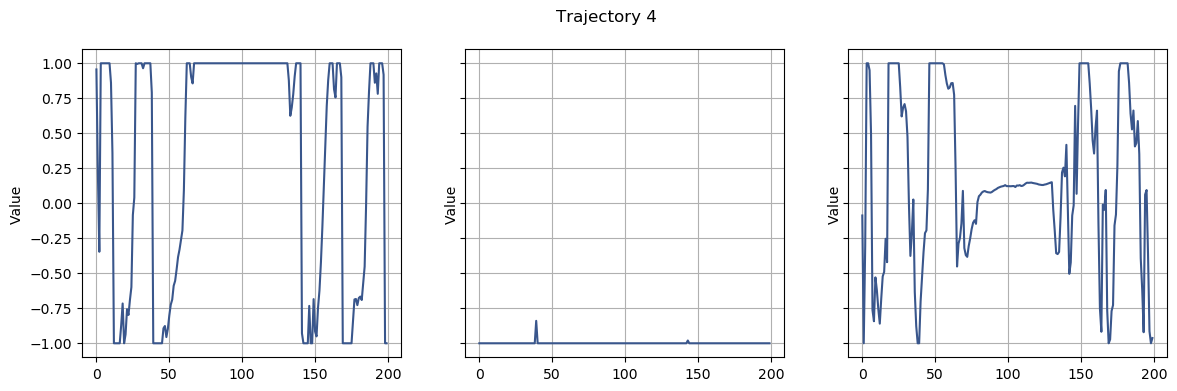

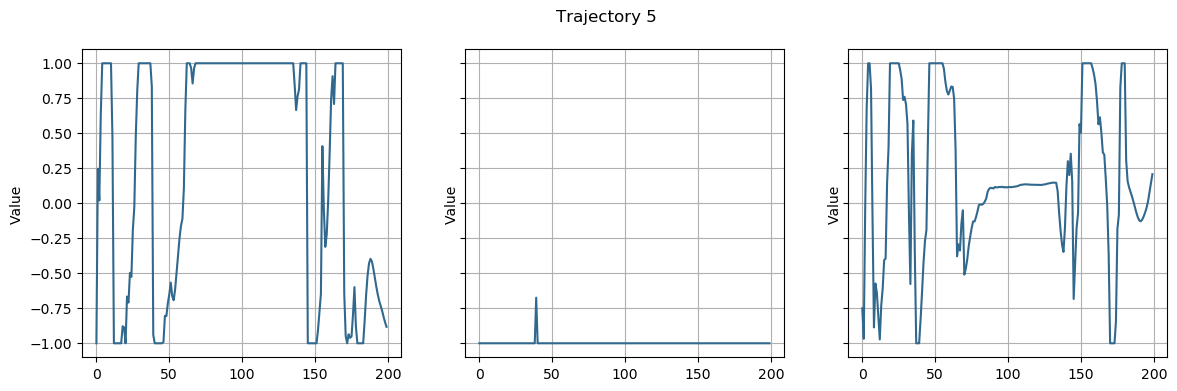

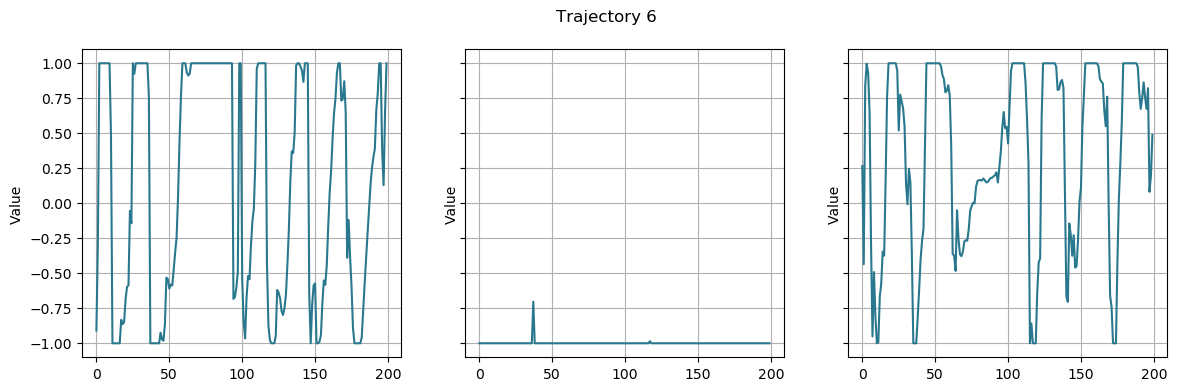

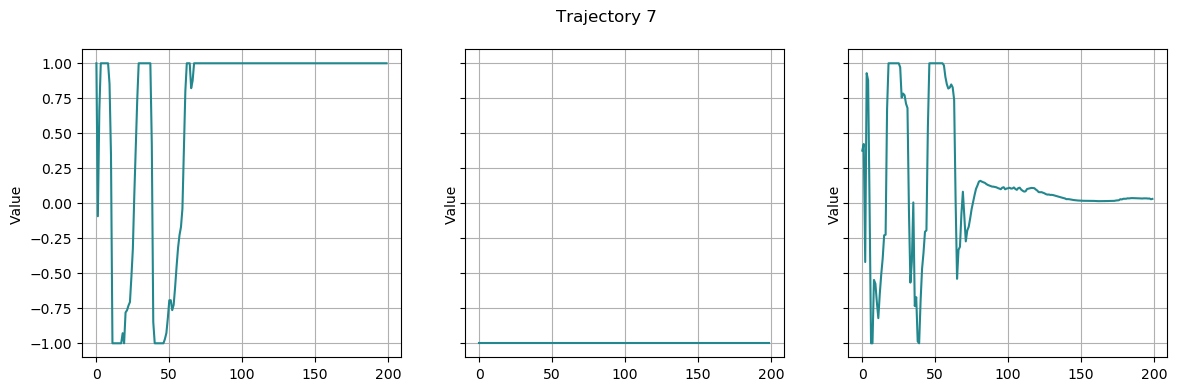

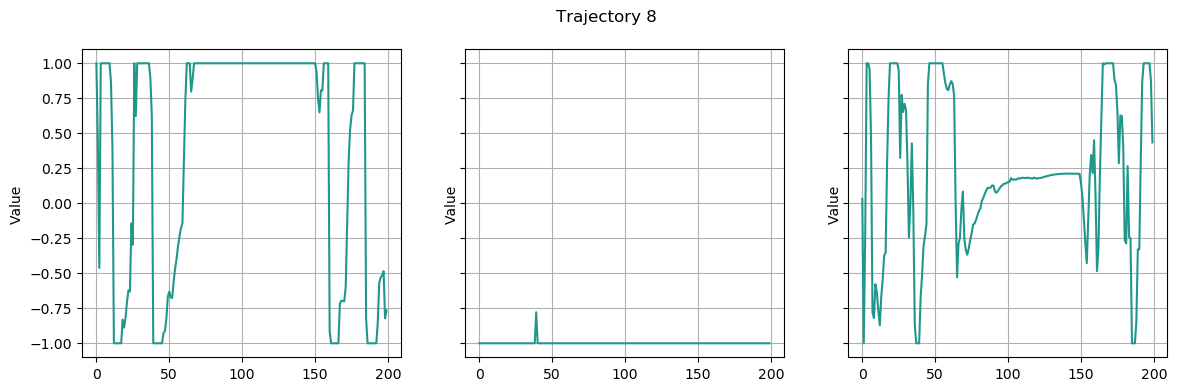

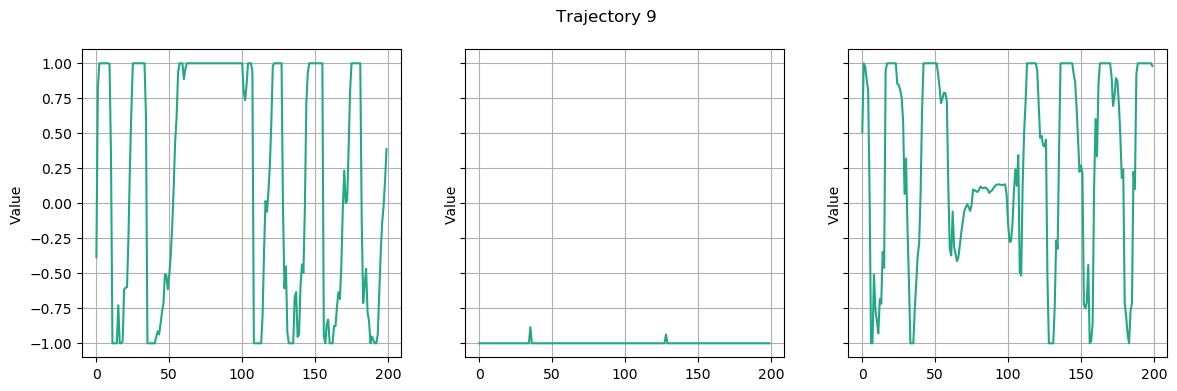

In [2]:
import matplotlib.pyplot as plt

# Plot data for each trajectory in separate subplots for x, y, z dimensions
for i, trajectory in enumerate(trajectories):
    fig, axes = plt.subplots(1, 3, figsize=(14, 4), sharey=True)
    colors = plt.cm.viridis(np.linspace(0, 0.6, num_trajectories))
    # trajectory = np.array(trajectory)
    fig.suptitle(f"Trajectory {i}")
    for j, ax in enumerate(axes):  # Iterate over x, y, z dimensions
        # ax.plot(trajectory[205:max(len(trajectory)-300, 600), j], color=colors[i])
        ax.plot(trajectory[:, j+10], color=colors[i])
        ax.set_ylabel("Value")
        ax.grid(True)

In [9]:
processed_trajectories = []

for i in sub_indices.keys():
    sub_start, sub_end = sub_indices[i]
    processed_trajectories.append(selected_trajectories[i][sub_start:sub_end])

num_trajectories = len(processed_trajectories)


In [10]:
t_steps = 400

# interpolate all to t_steps timesteps so that we have a num_trajectories x t_steps x 3 trajectories
interpolated_trajectories = np.zeros((num_trajectories, t_steps, 3))
for i in range(num_trajectories):
    traj = np.array(processed_trajectories[i])
    num_timesteps = traj.shape[0]
    interpolated_traj = np.zeros((t_steps, 3))
    for j in range(3):
        interpolated_traj[:, j] = np.interp(np.linspace(0, 1, t_steps), np.linspace(0, 1, num_timesteps), traj[:, j])
    interpolated_trajectories[i] = interpolated_traj

In [ ]:
np.save('hopper_interpolated_actions_10k.npy', interpolated_trajectories)
np.save('hopper_freqs_10k.npy', freqs)

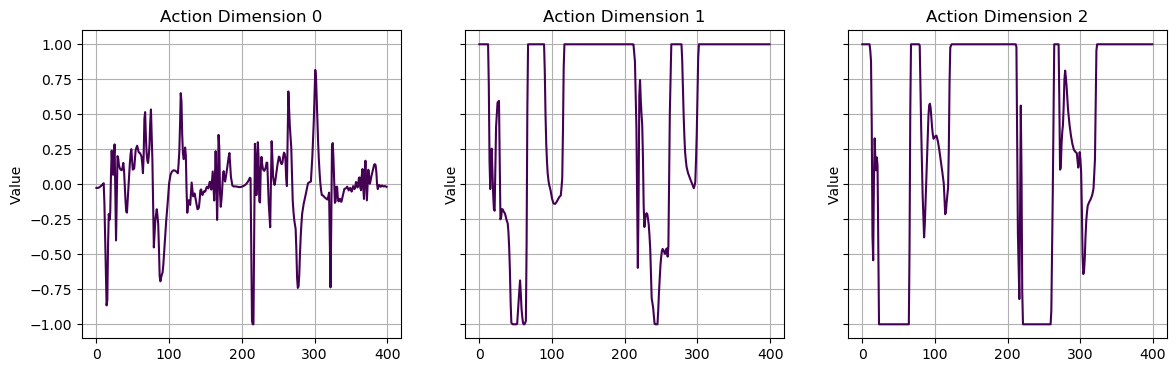

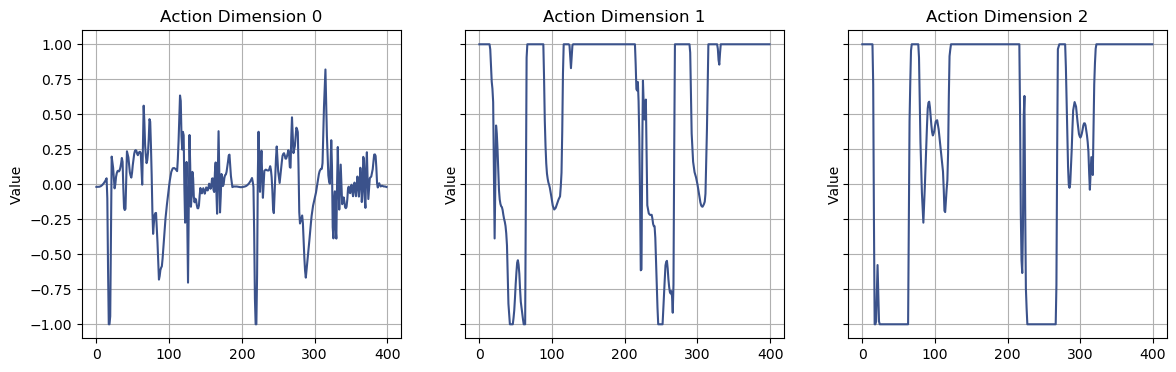

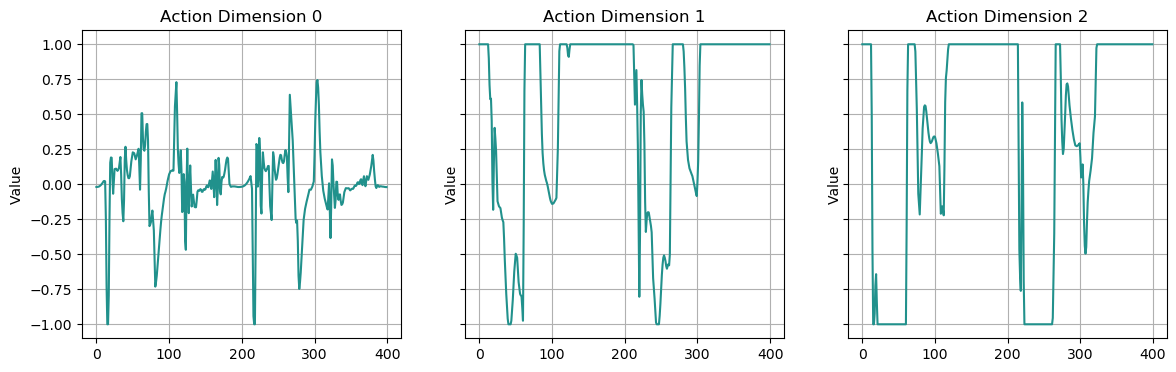

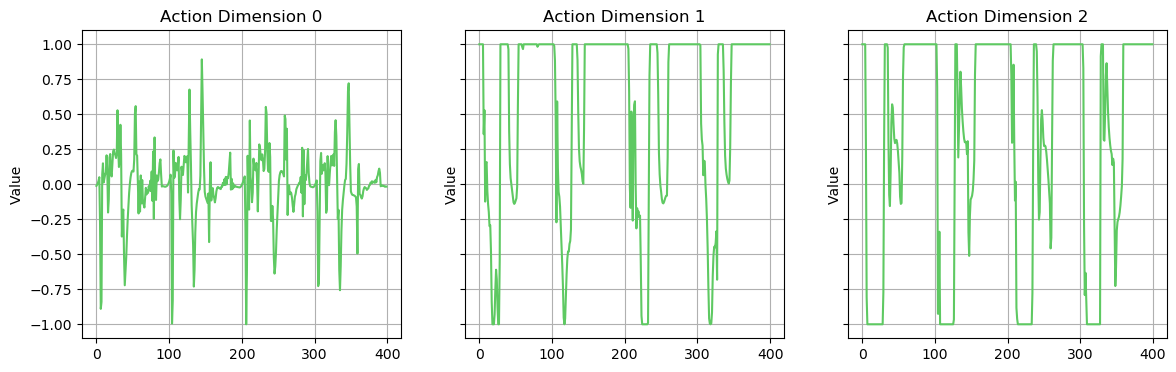

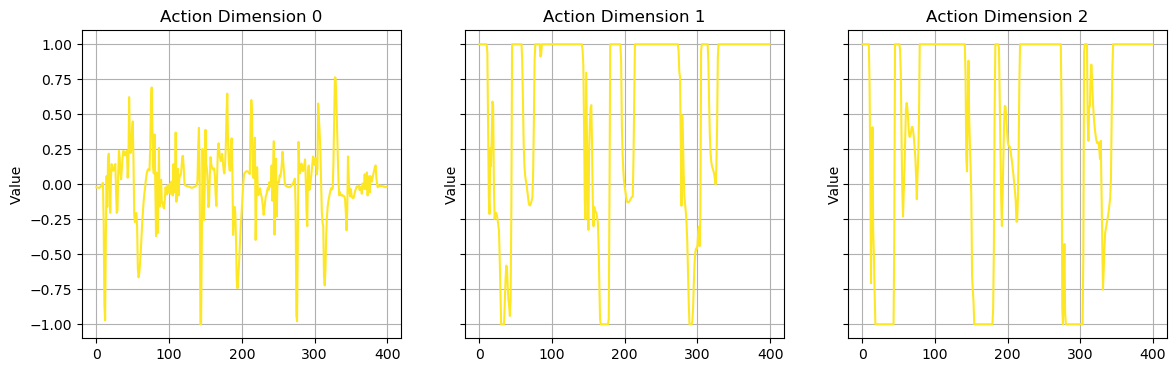

In [19]:
import matplotlib.pyplot as plt

# Plot data for each trajectory in separate subplots for x, y, z dimensions
for i, trajectory in enumerate(interpolated_trajectories):
    fig, axes = plt.subplots(1, 3, figsize=(14, 4), sharey=True)
    colors = plt.cm.viridis(np.linspace(0, 1, num_trajectories))
    for j, ax in enumerate(axes):  # Iterate over x, y, z dimensions
        ax.plot(trajectory[:, j], color=colors[i])
        ax.set_title(f"Action Dimension {['0', '1', '2'][j]}")
        ax.set_ylabel("Value")
        ax.grid(True)

# plt.tight_layout()
# plt.show()


In [13]:
#load hopper observations
file_path = 'hopper_observations.npy'
obss = np.load(file_path, allow_pickle=True)

my_id = 0
test_id = ids[my_id]
start_step = sub_indices[my_id][0]

print(f'obs: {obss[test_id][start_step]}')
print(f'action: {trajectories[test_id][start_step]}')

obs: [ 1.40937645e+00 -6.04250112e-04 -8.05713632e-02  3.36481823e-03
  7.88997210e-01  2.51384158e+00 -2.31315405e+00 -1.39180762e-01
  8.47442020e-01  3.59642776e-04 -1.92279412e-05]
action: [-0.02574568  1.          1.        ]
